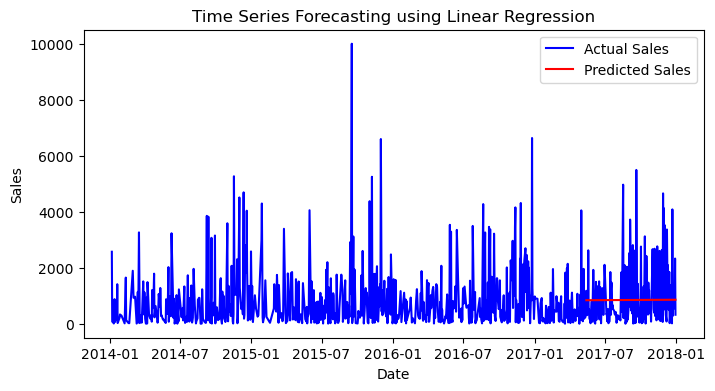

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
file_path = "C:\\Users\\exam\\Desktop\\Super_Store_data.csv"  
df = pd.read_csv(file_path, encoding="latin1")
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
df_sales['Days'] = (df_sales['Order Date'] - df_sales['Order Date'].min()).dt.days
X = df_sales[['Days']]
y = df_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 4))
plt.plot(df_sales['Order Date'], df_sales['Sales'], label='Actual Sales', color='blue')
plt.plot(df_sales.loc[X_test.index, 'Order Date'], y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting using Linear Regression')
plt.legend()
plt.show()
